In [ ]:
#@title Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#@title Importing the dataset
dataset = pd.read_csv('train.csv')

In [ ]:
print (dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
##viewing the data
dataset.head(62)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C


In [ ]:
dataset.shape

(891, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# check the number of missing values in each column
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# replacing the missing values in "Age" column with mean value
#dataset['Age'].fillna(dataset['Age'].mean(),inplace= True)
dataset['Cabin'] = dataset['Cabin'].notnull().astype(int)
#The inplace=True argument in pandas functions is used to make changes directly to the data frame or series without returning a new copy.

In [ ]:
#age through knn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
dataset['Age'] = impute_knn.fit_transform(dataset['Age'].values.reshape(-1,1))

In [ ]:
dataset['Embarked'].mode()
#So, the 2nd line of code is used when you are only interested in a single most common value (even if there are ties), while the first line of code is used when you want to know all of the most common values.

0    S
Name: Embarked, dtype: object

In [ ]:
dataset['Embarked'].mode()[0]

'S'

In [ ]:
# replacing the missing values in "Embarked" column with mode(most frequent) value
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [ ]:
dataset.head(62)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,0,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,0,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,0,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,0,C


In [ ]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# getting some statistical measures about the data
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
# finding the number of people survived and not survived
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
print (dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [ ]:
#@ data vaisualisation

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

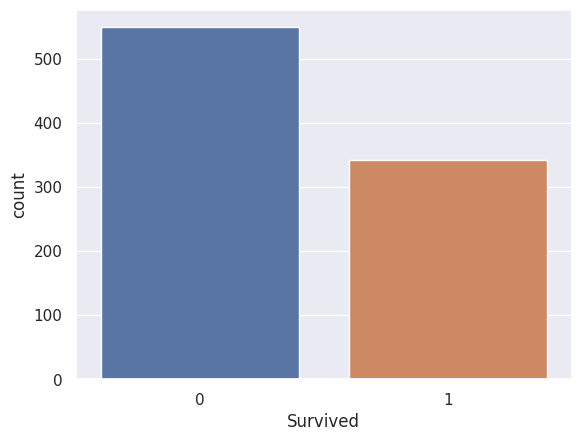

In [ ]:
# making a count plot for "Survived" column
sns.countplot(x= 'Survived', data = dataset)

<Axes: xlabel='Sex', ylabel='count'>

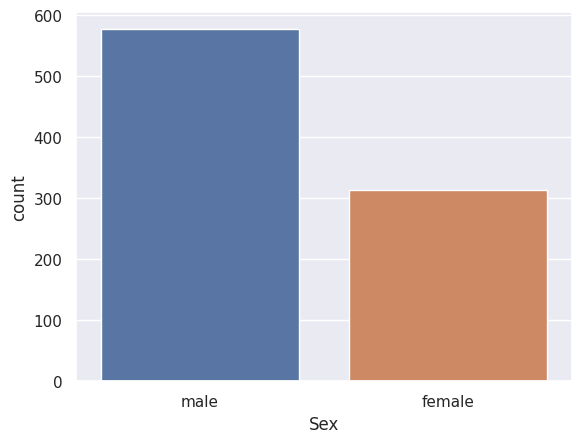

In [ ]:
sns.countplot(x= 'Sex', data = dataset)

<Axes: xlabel='Cabin', ylabel='count'>

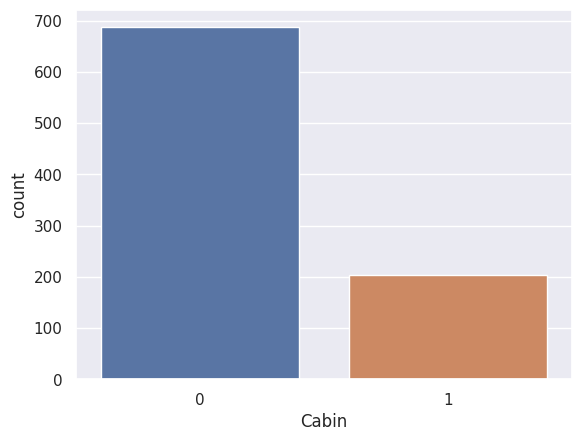

In [ ]:
sns.countplot(x= 'Cabin', data = dataset)

<Axes: xlabel='Parch', ylabel='count'>

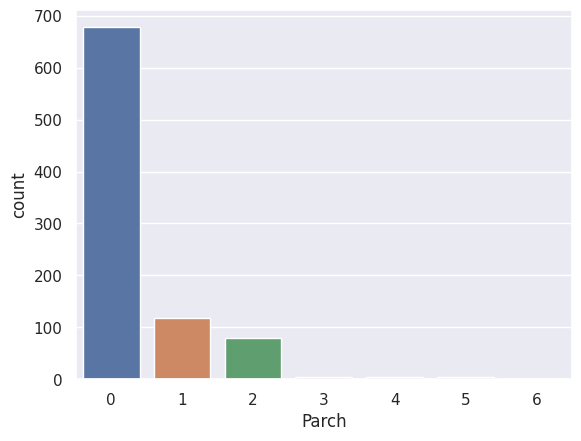

In [ ]:
sns.countplot(x= 'Parch', data = dataset)

<Axes: xlabel='Sex', ylabel='count'>

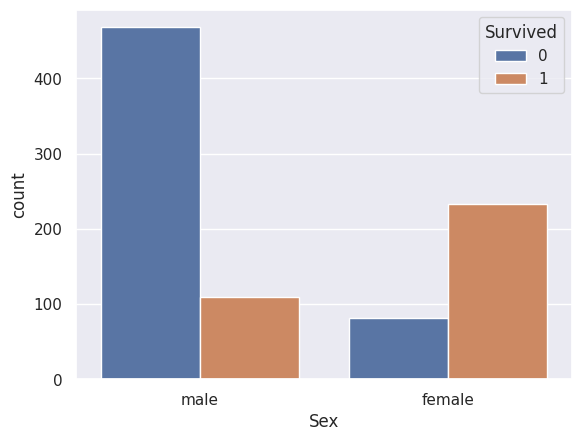

In [ ]:
sns.countplot(x= 'Sex', hue ='Survived', data = dataset)

<Axes: xlabel='Cabin', ylabel='count'>

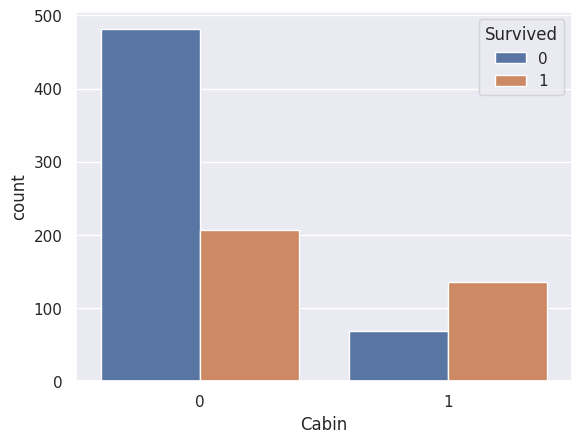

In [ ]:
sns.countplot(x= 'Cabin', hue ='Survived', data = dataset)

<Axes: xlabel='Pclass', ylabel='count'>

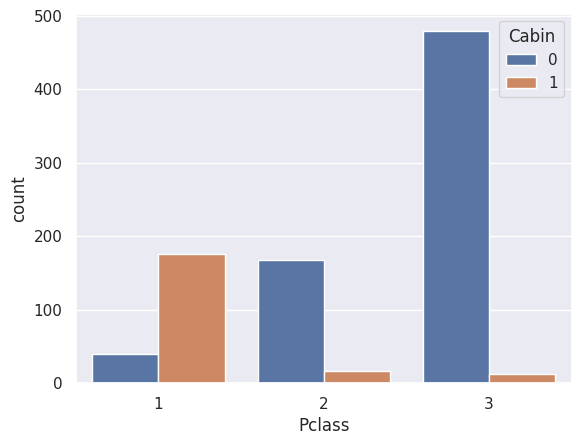

In [ ]:
sns.countplot(x= 'Pclass', hue ='Cabin', data = dataset)

<Axes: xlabel='Pclass', ylabel='count'>

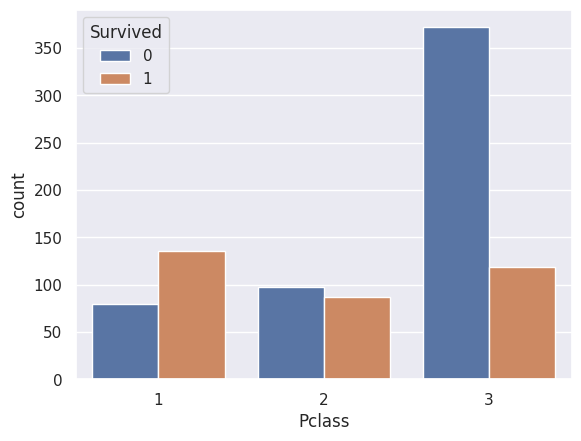

In [ ]:
sns.countplot(x= 'Pclass', hue ='Survived', data = dataset)

<Axes: xlabel='Parch', ylabel='count'>

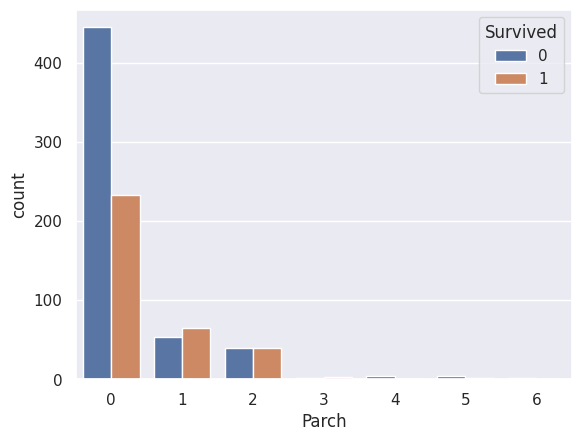

In [ ]:
sns.countplot(x= 'Parch', hue ='Survived', data = dataset)

<Axes: xlabel='SibSp', ylabel='count'>

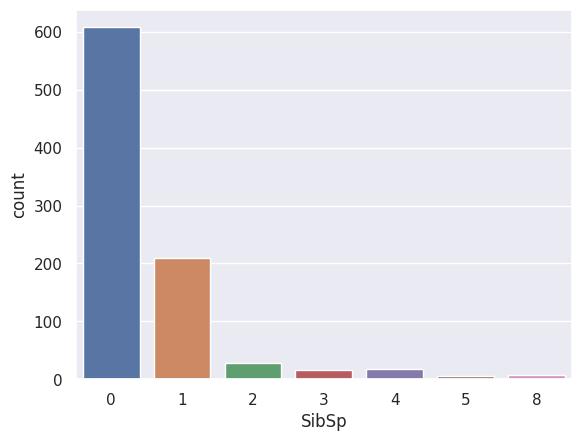

In [ ]:
sns.countplot(x= 'SibSp',  data = dataset)

<Axes: xlabel='SibSp', ylabel='count'>

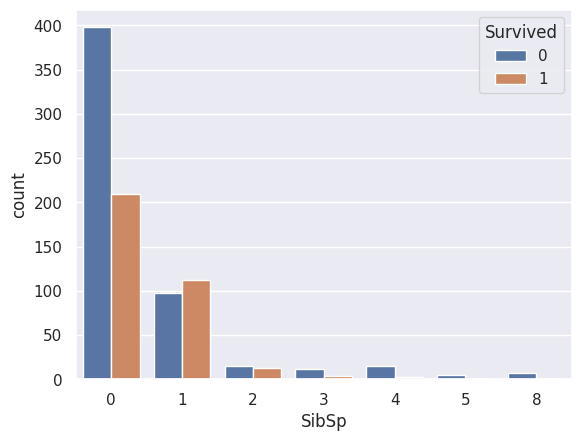

In [ ]:
sns.countplot(x= 'SibSp', hue ='Survived', data = dataset)

<ipython-input-161-0600be99a6b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


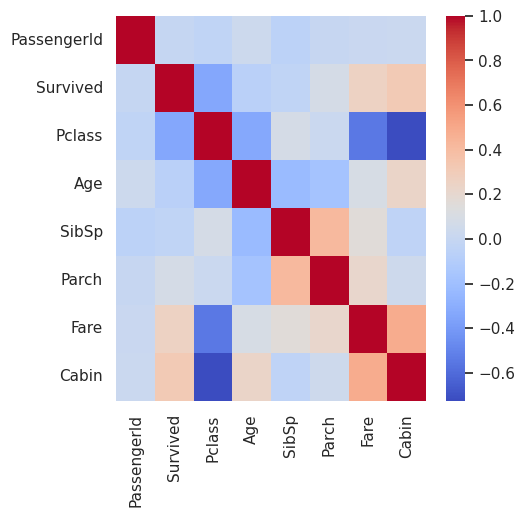

In [ ]:
# Assuming 'df' is your DataFrame
corr_matrix = dataset.corr()
plt.figure(figsize=(5,5)) # Optional: Changes the size of the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [ ]:
# converting categorical Columns

dataset.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


<ipython-input-164-42642c9826ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


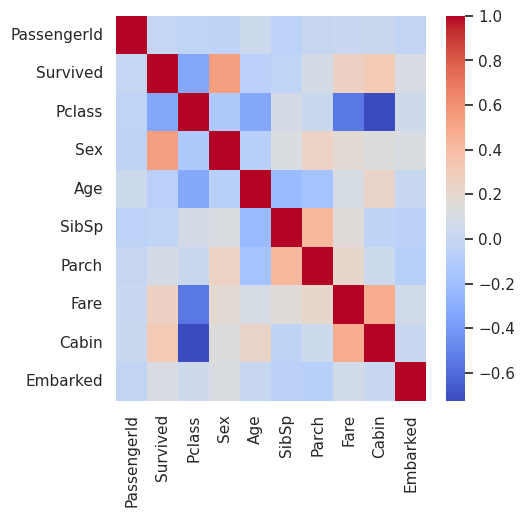

In [ ]:
corr_matrix = dataset.corr()
plt.figure(figsize=(5,5)) # Optional: Changes the size of the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [ ]:
correlation_with_survived = dataset.corr()['Survived'].sort_values()

# Print the correlations
print(correlation_with_survived)

Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Embarked       0.106811
Fare           0.257307
Cabin          0.316912
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64


<ipython-input-165-8285cc63332f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_survived = dataset.corr()['Survived'].sort_values()


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


separating features and target

In [ ]:
x = dataset[['Pclass','Sex', 'Age','SibSp','Parch','Fare','Cabin','Embarked']]

In [ ]:
dataset.head()
print(dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
2                               Heikkinen, Miss. Laina    1  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.000000      1   
4                             Allen, Mr. William Henry    0  35.000000      0   
..                                                 ...  .

In [ ]:
x.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,3,1,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,1,0
4,3,0,35.0,0,0,8.0500,0,0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [ ]:
y= dataset[['Survived']]

In [ ]:
y.head(5)

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [ ]:
print(y)

     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


Splitting into training and test set


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)


In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  712 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  179 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print (x_train)

[[-1.61413602 -0.7243102   1.22920747 ... -0.07868358  1.8649363
  -0.54803535]
 [-0.40055118 -0.7243102  -0.50350514 ... -0.37714494 -0.53621134
  -0.54803535]
 [ 0.81303367 -0.7243102   0.18957991 ... -0.47486697 -0.53621134
  -0.54803535]
 ...
 [ 0.81303367 -0.7243102   0.88266495 ... -0.35580399 -0.53621134
  -0.54803535]
 [-1.61413602  1.38062393 -1.19659018 ...  1.68320121  1.8649363
  -0.54803535]
 [-1.61413602 -0.7243102  -0.65752403 ...  0.86074761  1.8649363
  -0.54803535]]


In [ ]:
print (x_test)

[[ 0.81303367 -0.7243102   0.01239022 ... -0.33390078 -0.53621134
   1.04462249]
 [-0.40055118 -0.7243102   0.11257046 ... -0.42528387 -0.53621134
  -0.54803535]
 [ 0.81303367 -0.7243102  -0.73453348 ... -0.47486697 -0.53621134
  -0.54803535]
 ...
 [ 0.81303367  1.38062393  0.6516366  ... -0.02308312 -0.53621134
  -0.54803535]
 [-0.40055118  1.38062393 -0.96556183 ... -0.42528387 -0.53621134
  -0.54803535]
 [ 0.81303367  1.38062393 -1.96668467 ... -0.30589933  1.8649363
  -0.54803535]]


training the logistic regression

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

predicting the test set results

In [ ]:
y_pred = classifier.predict(x_test)

Making confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[90 15]
 [19 55]]


0.8100558659217877

In [ ]:
from sklearn.model_selection import cross_val_score
accuraciesLR = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuraciesLR.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuraciesLR.std()*100))

Accuracy: 79.49 %
Standard Deviation: 7.12 %


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training the random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RFclassifier.fit(x_train, y_train)
y_predRF = RFclassifier.predict(x_test)

<ipython-input-185-6d8d3fbab134>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFclassifier.fit(x_train, y_train)


Making the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmRF = confusion_matrix(y_test, y_predRF)
print(cmRF)
accuracy_score(y_test,y_predRF)

[[94 11]
 [19 55]]


0.8324022346368715

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RFclassifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Accuracy: 77.96 %
Standard Deviation: 4.72 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


XGBoost

In [ ]:
from xgboost import XGBClassifier
classifierXG = XGBClassifier()
classifierXG.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_predXG = classifierXG.predict(x_test)
cmXG = confusion_matrix(y_test, y_predXG)
print(cmXG)
accuracy_score(y_test, y_predXG)

[[90 15]
 [17 57]]


0.8212290502793296

In [ ]:
from sklearn.model_selection import cross_val_score
accuraciesXG = cross_val_score(estimator = classifierXG, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuraciesXG.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuraciesXG.std()*100))

Accuracy: 79.35 %
Standard Deviation: 4.63 %


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
classifierCAT = CatBoostClassifier()
classifierCAT.fit(x_train, y_train)

Learning rate set to 0.008911
0:	learn: 0.6869471	total: 892us	remaining: 892ms
1:	learn: 0.6815966	total: 1.53ms	remaining: 763ms
2:	learn: 0.6763218	total: 2.06ms	remaining: 686ms
3:	learn: 0.6700689	total: 2.68ms	remaining: 668ms
4:	learn: 0.6646943	total: 3.35ms	remaining: 666ms
5:	learn: 0.6587656	total: 3.94ms	remaining: 653ms
6:	learn: 0.6530731	total: 4.63ms	remaining: 656ms
7:	learn: 0.6471604	total: 5.25ms	remaining: 651ms
8:	learn: 0.6429772	total: 5.8ms	remaining: 639ms
9:	learn: 0.6380957	total: 6.36ms	remaining: 629ms
10:	learn: 0.6327543	total: 6.93ms	remaining: 623ms
11:	learn: 0.6276939	total: 7.9ms	remaining: 651ms
12:	learn: 0.6222859	total: 9ms	remaining: 683ms
13:	learn: 0.6181797	total: 9.9ms	remaining: 697ms
14:	learn: 0.6135392	total: 10.8ms	remaining: 711ms
15:	learn: 0.6102452	total: 11.7ms	remaining: 722ms
16:	learn: 0.6061242	total: 12.6ms	remaining: 729ms
17:	learn: 0.6022187	total: 13.7ms	remaining: 748ms
18:	learn: 0.5986566	total: 14.6ms	remaining: 752ms

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_predCAT = classifierCAT.predict(x_test)
cmCAT = confusion_matrix(y_test, y_predCAT)
print(cmCAT)
accuracy_score(y_test, y_predCAT)

[[95 10]
 [21 53]]


0.8268156424581006

In [ ]:
from sklearn.model_selection import cross_val_score
accuraciesCAT = cross_val_score(estimator = classifierCAT, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuraciesCAT.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuraciesCAT.std()*100))

predicting the result

In [ ]:
 testDataset = pd.read_csv('test.csv')

In [ ]:
testDataset.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
testDataset.shape

(418, 11)

In [ ]:
testDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
testDataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
testDataset['Cabin'] = testDataset['Cabin'].notnull().astype(int)

In [ ]:
testDataset['Age'] = impute_knn.fit_transform(testDataset['Age'].values.reshape(-1,1))

In [ ]:
testDataset['Fare'] = impute_knn.fit_transform(testDataset['Fare'].values.reshape(-1,1))

In [ ]:
testDataset.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
testDataset.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
x_pred = testDataset[['Pclass','Sex', 'Age','SibSp','Parch','Fare','Cabin','Embarked']]

In [ ]:
x_pred = sc.transform(x_pred)

In [ ]:
y_pred_pred = classifierCAT.predict(x_pred)

In [ ]:
print(y_pred_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 0]


In [ ]:
testDataset['Survived'] = y_pred_pred

# Create a new DataFrame with only 'PassengerId' and 'Survived'
new_df = testDataset[['PassengerId', 'Survived']].copy()

# Now 'new_df' is a new DataFrame with the columns 'PassengerId' and 'Survived'
print(new_df)
# Save the new DataFrame to an Excel file
new_df.to_excel('gender_submission.xlsx', index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
